# Spaceship Titanic

## Description
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

## Evaluation Metric
Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

## Glossary
* Importing Libraries;
* Importing Data;
* EDA;
* Feature Engineering;
* Modeling;
* Tuning;
* Predicting.

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_columns", None)

## Importing Data

In [3]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

print(f"Train dataframe shape: {train_df.shape}")
print(f"Test dataframe shape: {test_df.shape}")

Train dataframe shape: (8693, 14)
Test dataframe shape: (4277, 13)


## EDA

In this part of the notebook I'll try to find some meaningful patterns or any informations that can help me understand better the train data before I actually change it(if necessary) and train my model.

In [4]:
display(train_df.head())
display(train_df.tail())
display(train_df.info())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

In [5]:
list(set(train_df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('bool')]

In [6]:
features_with_na = [
    features for features in train_df.columns 
        if train_df[features].isnull().sum() > 0
]

for features in features_with_na:
    print(features, np.round(train_df[features].isnull().mean(), 4) * 100, "% of missing values")

HomePlanet 2.31 % of missing values
CryoSleep 2.5 % of missing values
Cabin 2.29 % of missing values
Destination 2.09 % of missing values
Age 2.06 % of missing values
VIP 2.34 % of missing values
RoomService 2.08 % of missing values
FoodCourt 2.11 % of missing values
ShoppingMall 2.39 % of missing values
Spa 2.11 % of missing values
VRDeck 2.16 % of missing values
Name 2.3 % of missing values


This data has some null values in most of the columns but it's nothing agravating, so I'll wont drop any column. It has mainly 3 types of data: float, object and bool, so I'll split the data in categorical and numerical datasets to visualize the dependence of those variables in comparisson with the target.

### Numerical Variables EDA

In [7]:
num_features = [
    features for features in train_df.columns
        if train_df[features].dtypes != "O"
]

print(f"Number of numerical features {len(num_features)}")
display(train_df[num_features].head())

Number of numerical features 7


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True


In [8]:
discrete_features = [
    features for features in num_features
        if len(train_df[features].unique()) <= 25
]

print(f"Number of numerical discrete features {len(discrete_features)}")
display(train_df[discrete_features].head())

Number of numerical discrete features 1


,Transported
0,False
1,True
2,False
3,False
4,True


In [9]:
continous_features = [
    features for features in num_features
        if features not in discrete_features
]

print("Number of numerical continuous features", len(continous_features))
display(train_df[continous_features].head())

Number of numerical continuous features 6


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


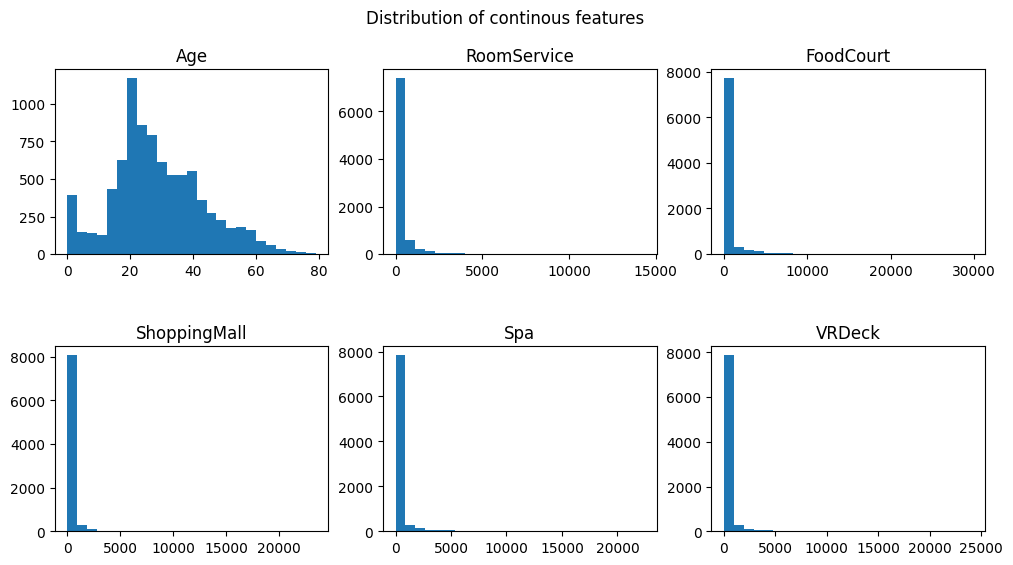

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Distribution of continous features")
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(continous_features):
    row = i // 3
    col = i % 3
    ax[row, col].hist(train_df[feature], bins=25)
    ax[row, col].set_title(feature)
plt.show()

All features but age aren't normally distributed, so I'll probably apply normalization on it later.

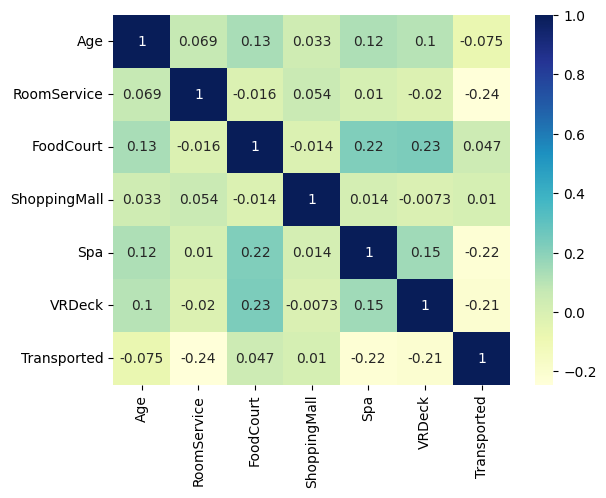

In [11]:
sns.heatmap(train_df[num_features].corr(), annot=True, cmap="YlGnBu")
plt.show()

Correlating numerical variables doesn't appear to provide any meaningful information, except perhaps that transported individuals are correlated with younger age.

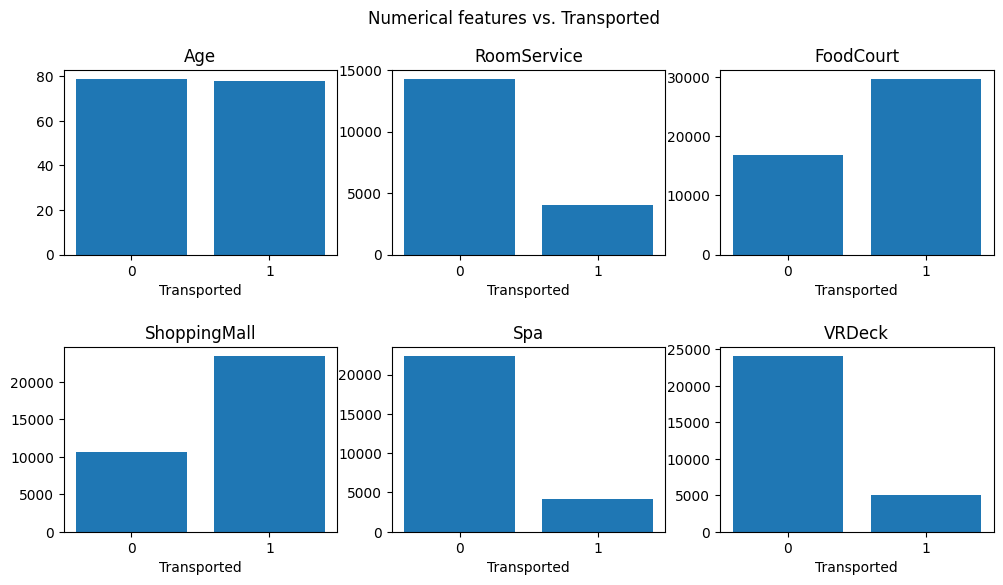

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle("Numerical features vs. Transported")
fig.subplots_adjust(hspace=0.5)

for i, features in enumerate(continous_features):
    row = i // 3
    col = i % 3
    ax[row, col].bar(train_df["Transported"], train_df[features])
    ax[row, col].set_title(features)
    ax[row, col].set_xlabel("Transported")
    ax[row, col].set_xticks([0, 1])
plt.show()

I continue to be unsure of any relation between the numerical variables and the actual prediciton.

### Categorical Variables EDA

In [13]:
cat_features = [
    feature for feature in train_df.columns
        if train_df[feature].dtypes == "O"
]

print(f"Number of categorical features: {len(cat_features)}")
display(train_df[cat_features].head())

Number of categorical features: 7


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


Based on the dataset description, PassengerId can be useful as it represents the group and the number of passengers that were on this group, so I'll probably split this into two categories later. The other variables, I'll do OneHotEncode, and just drop name because it won't be useful.

In [14]:
data = train_df.copy()


for feature in cat_features:
    #print the column name and its unique values, excluding nan
    print(f"{feature} has {len(data[feature].dropna().unique())} values:\n{data[feature].dropna().unique()}\n")

PassengerId has 8693 values:
['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']

HomePlanet has 3 values:
['Europa' 'Earth' 'Mars']

CryoSleep has 2 values:
[False True]

Cabin has 6560 values:
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']

Destination has 3 values:
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']

VIP has 2 values:
[False True]

Name has 8473 values:
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']



Cabin can be split into multiple new features too, I'll probably do that.

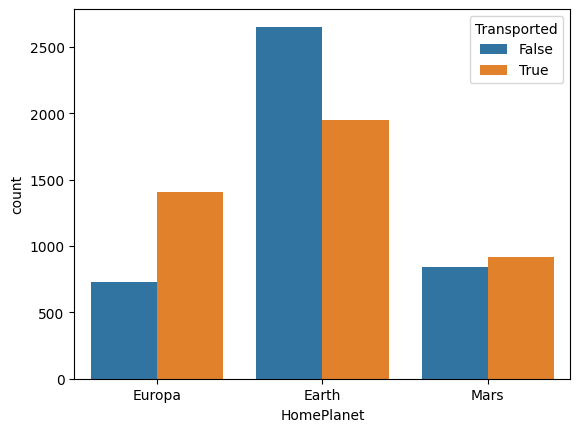

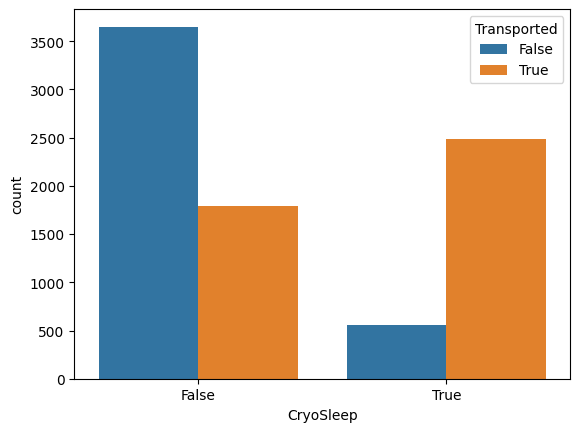

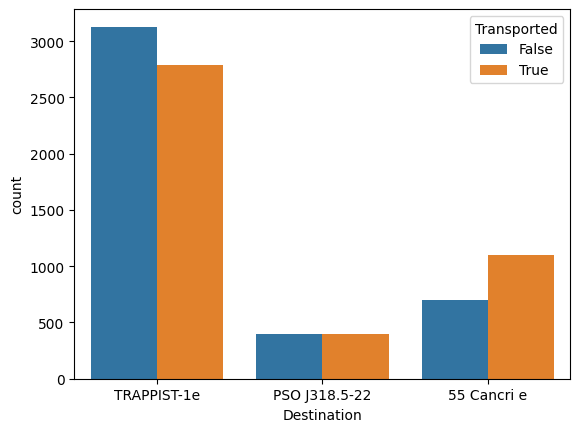

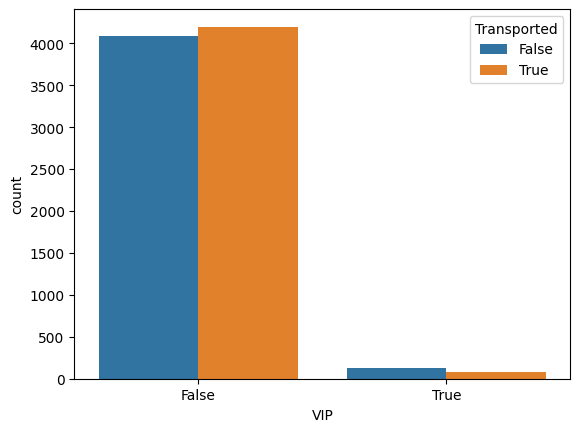

In [15]:
data = train_df.copy()
plot_cat_features = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

for feature in plot_cat_features:
    sns.countplot(x=feature, hue="Transported", data=data)
    plt.show()

It appears that a good part of people in CryoSleep have been transported.

### So what I have take of insight from here?

* I'll have to apply normalization in all numerical features, but age;
* I think I'll just split PassengerID into two new features;
* I'll do the same thing with cabin too, split it and just take the side part;
* I'll OneHotEncode all categorical features;
* I'll drop Name, this won't be useful too.

## Feature Engineering

In [65]:
# Define the columns to be deleted
col_to_del = ["Name", "Cabin", "PassengerId", "HomePlanet", "Destination", "Deck_Side"]

# Column to split
col_to_split = ["PassengerId", "Cabin"]

# Features to OneHotEncode
col_to_encode = ['HomePlanet', 'Destination', 'Deck_Side']

In [69]:
class ColumnSpliter(BaseEstimator, TransformerMixin):
    def __init__(self, column, prefix=None):
        self.column = column
        self.prefix = prefix

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X, columns=cat_features)

        X_df['Group_Id'] = X_df[self.column[0]].str.split('_').str[0]
        X_df['Passenger_Id'] = X_df[self.column[0]].str.split('_').str[1]
        
        X_df['Deck_Side'] = X_df[self.column[1]].str.split('/').str[2]
        
        return X_df

    def get_feature_names_out(self, input_features=None):
        new_features = ['Group_Id', 'Passenger_Id', 'Deck_Side']
        if input_features is None:
            # Return only the new features if input_features is not provided
            return new_features
        if self.prefix:
            # Add prefix to new features
            new_features = [self.prefix + "_" + f for f in new_features]
        # Combine new features with existing input features
        return list(input_features) + new_features
    
class ColumnDeleter(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X)
        X_df = X_df.drop(self.column, axis=1)
        return X_df.to_numpy()
        
    def get_feature_names_out(self, input_features=None):
        # Exclude deleted columns from input_features
        # remove split_Deck_Side from input_features
        input_features.remove("split_Deck_Side")
        
        #input_features = input_feat.columns
        return [feat for feat in input_features if feat not in self.column]
    
class ColumnEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column, prefix=None):
        self.column = column
        self.prefix = prefix

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X, columns=['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin',
                                         'Destination','VIP', 'Name', 'Group_Id', 'Passenger_Id',
                                         'Deck_Side'])

        # Convert specified columns to categorical dtype if not already
        for col in self.column:
            X_df[col] = X_df[col].astype('category')

        # Apply one-hot encoding using pd.get_dummies
        X_encoded = pd.get_dummies(X_df[self.column], prefix=self.prefix)
        # Combine encoded features with remaining columns
        X_df_encoded = pd.concat([X_df, X_encoded], axis=1)
        
        return X_df_encoded

    def get_feature_names_out(self, input_features=None):
        new_features = ['Earth', 'Europa', 'Mars', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e',
                        'Deck_Side_P', 'Deck_Side_S']
        if input_features is None:
            # Return only the new features if input_features is not provided
            return new_features
        if self.prefix:
            # Add prefix to new features
            new_features = [self.prefix + "_" + f for f in new_features]
        # Combine new features with existing input features
        return list(input_features) + new_features
        
num_pipe = Pipeline([
    ("inputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("inputer", SimpleImputer(strategy="most_frequent")),
    ("spliter", ColumnSpliter(column=col_to_split, prefix="split")),
    ("encoder", ColumnEncoder(column=col_to_encode, prefix="encoded")),
    ("deleter", ColumnDeleter(column=col_to_del))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, continous_features),
        ("cat", cat_pipe, cat_features)
    ], remainder='drop'
)

In [70]:
# In your train cell
train_transformed = preprocessor.fit_transform(train_df)

feat_transformed = preprocessor.get_feature_names_out()
train_df_transformed = pd.DataFrame(train_transformed, columns=feat_transformed)
train_df_transformed = train_df_transformed.apply(pd.to_numeric)

display(train_df_transformed.head())
display(train_df_transformed.shape)
display(train_df_transformed.info())

,num__Age,num__RoomService,num__FoodCourt,num__ShoppingMall,num__Spa,num__VRDeck,cat__CryoSleep,cat__VIP,cat__split_Group_Id,cat__split_Passenger_Id,cat__encoded_Earth,cat__encoded_Europa,cat__encoded_Mars,cat__encoded_55 Cancri e,cat__encoded_PSO J318.5-22,cat__encoded_TRAPPIST-1e,cat__encoded_Deck_Side_P,cat__encoded_Deck_Side_S
0,0.709437,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,False,False,1,1,False,True,False,False,False,True,True,False
1,-0.336717,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,False,False,2,1,True,False,False,False,False,True,False,True
2,2.034566,-0.275409,1.955616,-0.290817,5.694289,-0.225782,False,True,3,1,False,True,False,False,False,True,False,True
3,0.290975,-0.340590,0.517406,0.330225,2.683471,-0.098708,False,False,3,2,False,True,False,False,False,True,False,True
4,-0.894666,0.118709,-0.243409,-0.038048,0.225732,-0.267258,False,False,4,1,True,False,False,False,False,True,False,True


(8693, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num__Age                    8693 non-null   float64
 1   num__RoomService            8693 non-null   float64
 2   num__FoodCourt              8693 non-null   float64
 3   num__ShoppingMall           8693 non-null   float64
 4   num__Spa                    8693 non-null   float64
 5   num__VRDeck                 8693 non-null   float64
 6   cat__CryoSleep              8693 non-null   bool   
 7   cat__VIP                    8693 non-null   bool   
 8   cat__split_Group_Id         8693 non-null   int64  
 9   cat__split_Passenger_Id     8693 non-null   int64  
 10  cat__encoded_Earth          8693 non-null   bool   
 11  cat__encoded_Europa         8693 non-null   bool   
 12  cat__encoded_Mars           8693 non-null   bool   
 13  cat__encoded_55 Cancri e    8693 

None

After preprocessing my dataset, now I'ts time to choose some estimators to train my model.

## Modeling

I'll plot a pairplot on all my data to see what models I can fit here.

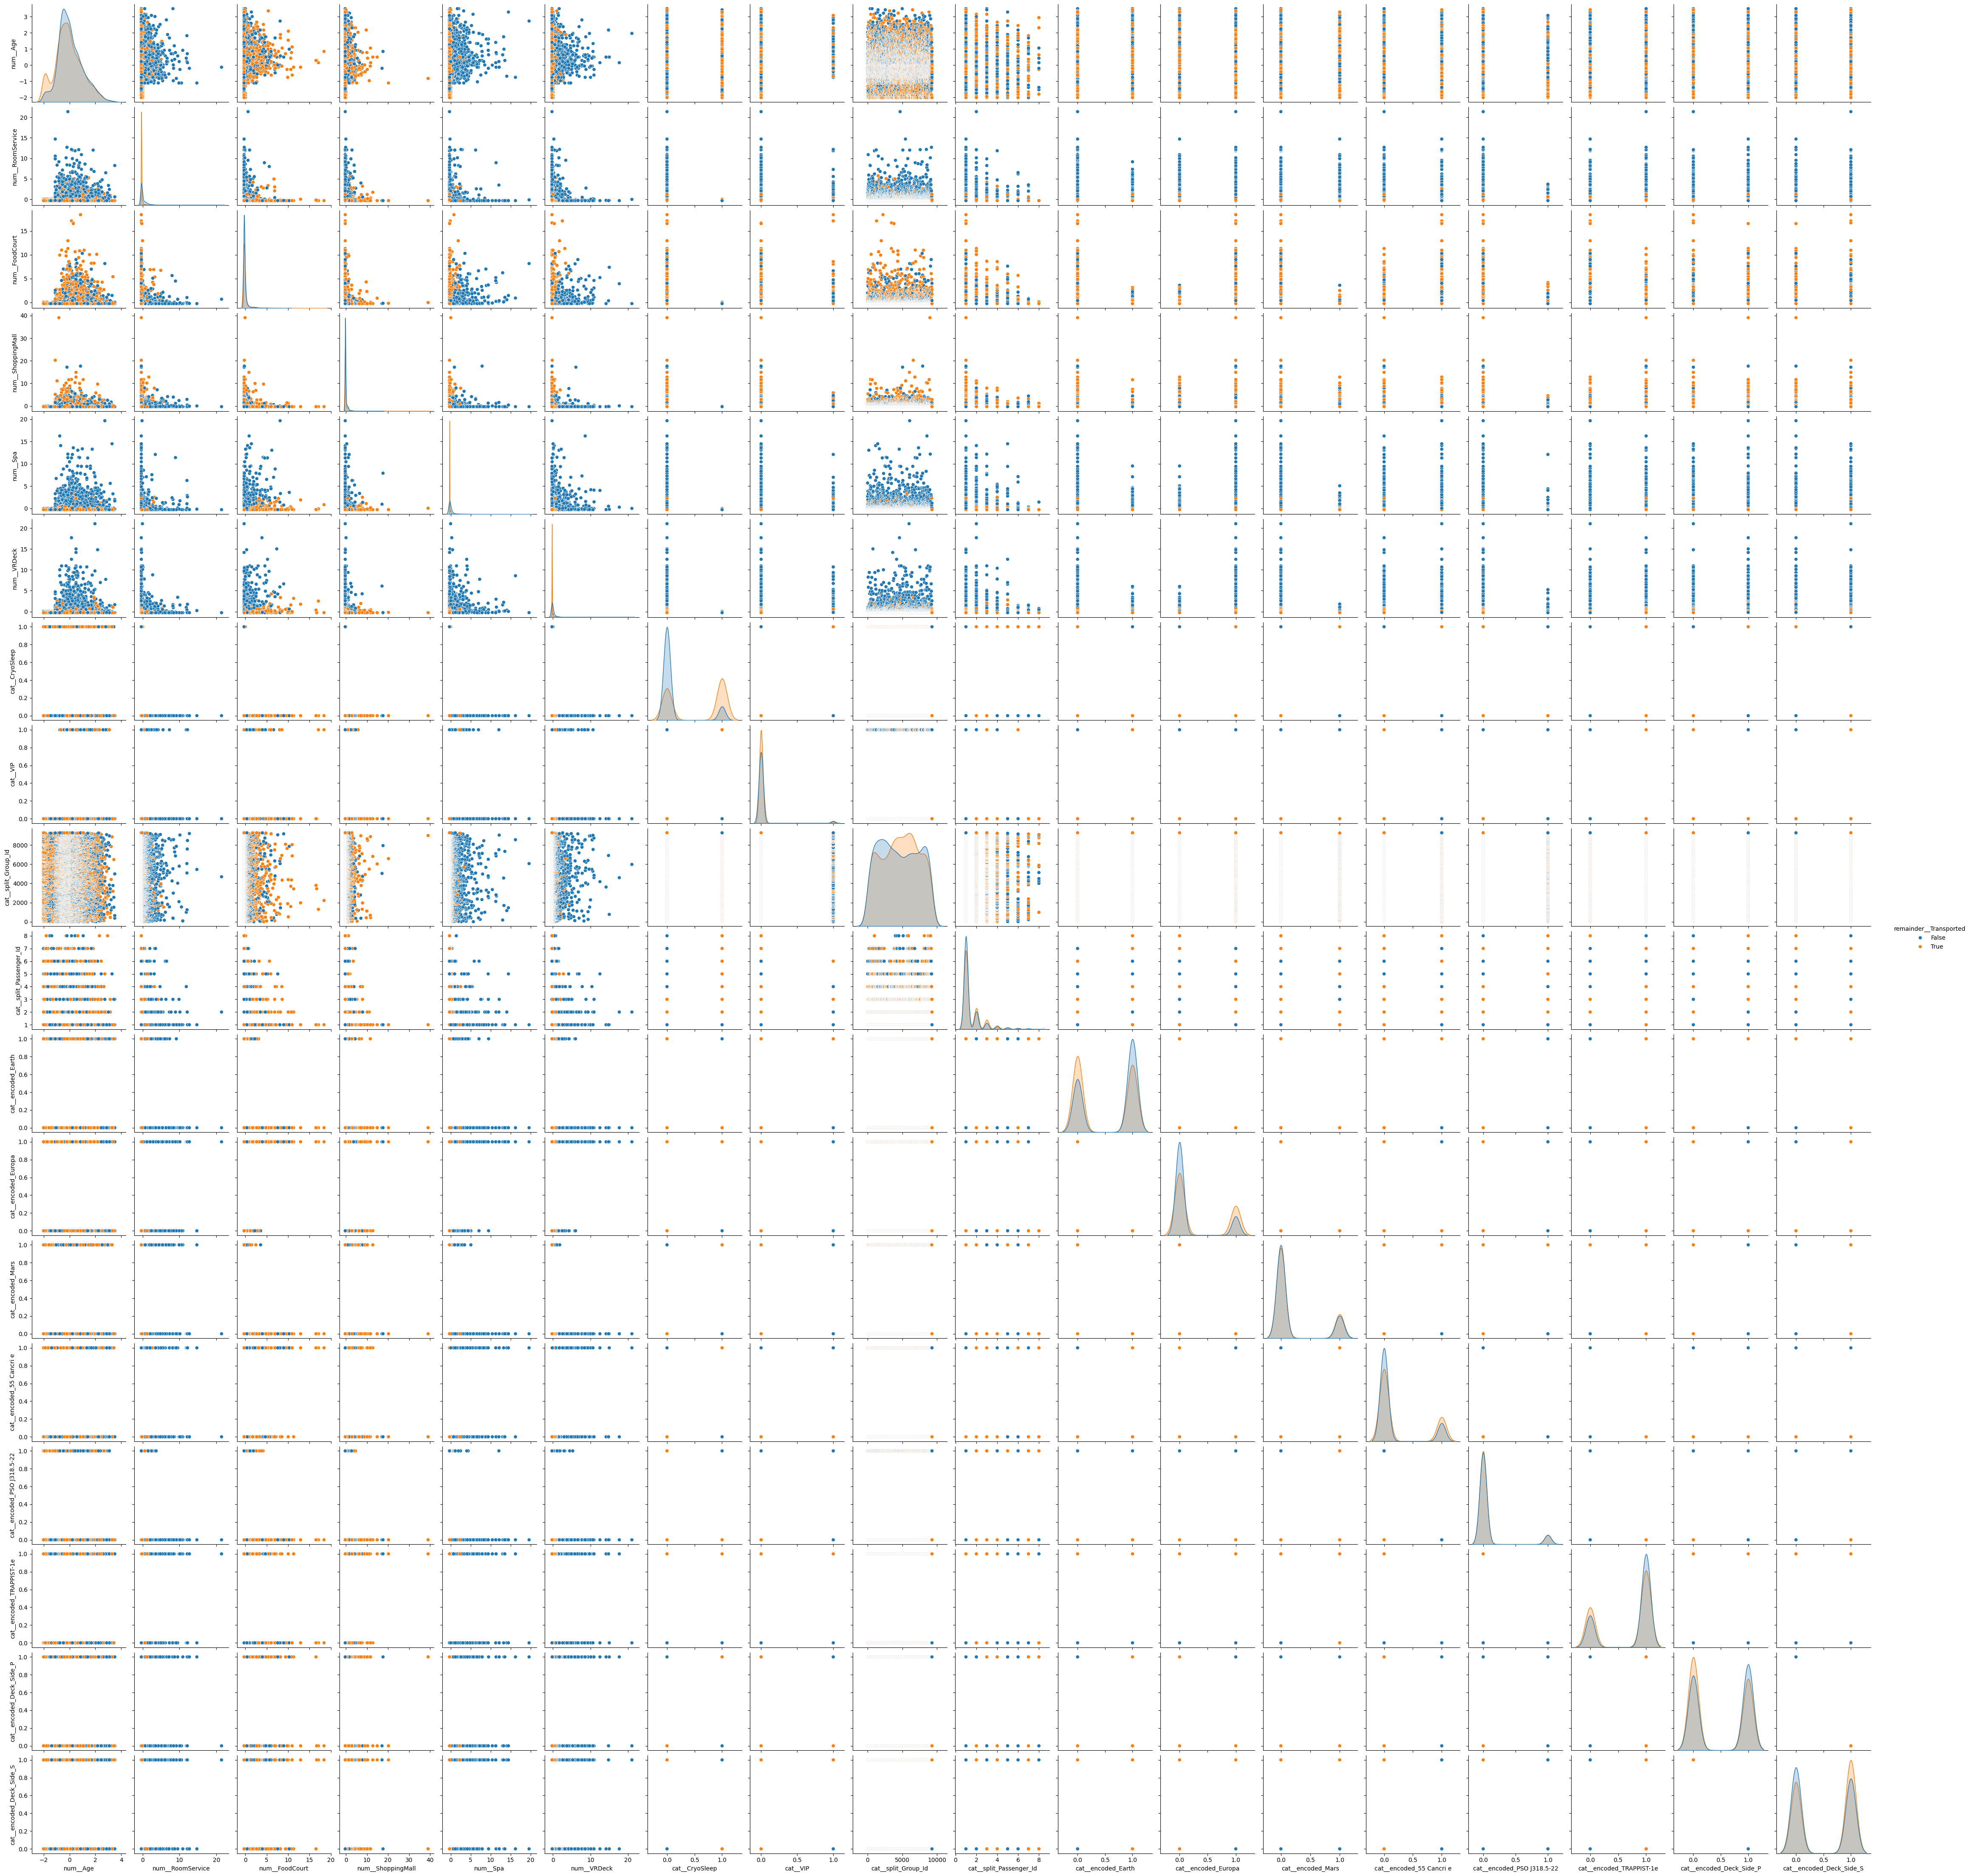

In [19]:
sns.pairplot(hue="remainder__Transported", data=train_df_transformed)
plt.show()

This data has a lot of overlapping, its nearly impossible to fit a straight line here, so linear model's probably won't performe good. On the other hand, KNN, DecisionTrees and Ensemble Models will probably have a better performance here, so I'll try to use some of them.

In [73]:
X_train, X_val, y_train, y_val = train_test_split(train_df_transformed, 
                                                  train_df["Transported"],
                                                  test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (6954, 18)
y_train shape: (6954,)
X_val shape: (1739, 18)
y_val shape: (1739,)


In [75]:
display(X_train.head())
display(X_val.head())

,num__Age,num__RoomService,num__FoodCourt,num__ShoppingMall,num__Spa,num__VRDeck,cat__CryoSleep,cat__VIP,cat__split_Group_Id,cat__split_Passenger_Id,cat__encoded_Earth,cat__encoded_Europa,cat__encoded_Mars,cat__encoded_55 Cancri e,cat__encoded_PSO J318.5-22,cat__encoded_TRAPPIST-1e,cat__encoded_Deck_Side_P,cat__encoded_Deck_Side_S
2333,-0.057743,-3.405899e-01,-0.252817,-0.290817,0.306649,-0.269023,False,False,2513,1,True,False,False,False,False,True,False,True
2589,-0.824923,-3.405899e-01,0.462211,-0.238924,-0.276663,-0.269023,False,False,2774,2,True,False,False,False,False,True,True,False
8302,-0.057743,-3.405899e-01,-0.287314,-0.290817,-0.276663,-0.269023,True,False,8862,4,False,True,False,True,False,False,False,True
8177,-0.615692,4.308269e-17,-0.286060,0.192960,0.591192,-0.269023,False,False,8736,2,False,False,True,False,False,True,True,False
500,0.500206,-3.405899e-01,-0.287314,-0.290817,-0.276663,-0.269023,True,False,539,2,False,True,False,True,False,False,True,False


,num__Age,num__RoomService,num__FoodCourt,num__ShoppingMall,num__Spa,num__VRDeck,cat__CryoSleep,cat__VIP,cat__split_Group_Id,cat__split_Passenger_Id,cat__encoded_Earth,cat__encoded_Europa,cat__encoded_Mars,cat__encoded_55 Cancri e,cat__encoded_PSO J318.5-22,cat__encoded_TRAPPIST-1e,cat__encoded_Deck_Side_P,cat__encoded_Deck_Side_S
304,-0.685435,0.291514,-0.068415,0.770479,-2.739958e-01,0.663739,False,False,337,2,False,False,True,False,False,True,False,True
2697,-0.755179,-0.334527,0.279691,-0.290817,-2.766634e-01,-0.268140,False,False,2891,1,True,False,False,False,False,True,False,True
8424,0.848924,-0.340590,-0.287314,-0.290817,-2.766634e-01,-0.269023,True,False,8998,1,True,False,False,False,False,True,False,True
1672,0.430462,-0.340590,-0.075315,0.439033,-5.054495e-17,-0.269023,False,False,1771,1,True,False,False,False,False,True,True,False
8458,0.988411,-0.340590,-0.287314,-0.290817,-2.766634e-01,-0.269023,True,False,9034,2,False,True,False,False,False,True,True,False


So I'll first train some models without tuning, and see what's get's better accuracy.

In [76]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_val, y_val)}")
    print()

/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.7768832662449684

DecisionTreeClassifier: 0.7400805060379528

RandomForestClassifier: 0.780333525014376

KNeighborsClassifier: 0.5244393329499712

XGBClassifier: 0.7866589994249569



XGBClassifier appears to be the best.

## Tuning

Let's now try to find better params using GridSearchCV.

In [24]:
# Implement gridsearchcv for all my models on the models dictionary

grid_dict = {
    "LogisticRegression":'',
    "DecisionTreeClassifier": '',
    "RandomForestClassifier": '',
    "KNeighborsClassifier": '',
    "XGBClassifier": ''
}

params_grid_dict = {
    "LogisticRegression": {
        "penalty": ["l1", "l2"],
        "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 7, 9, 11, 13]
    },
    "RandomForestClassifier": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 7, 9, 11, 13]
    },
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7, 9, 11, 13]
    },
    "XGBClassifier": {
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7, 9, 11, 13]
    }
}

for grid in grid_dict:
    grid_dict[grid] = GridSearchCV(models[grid], params_grid_dict[grid],verbose=False)
    grid_dict[grid].fit(X_train, y_train)
    
    models[grid] = grid_dict[grid].best_estimator_
    
    print(f"{grid}: {grid_dict[grid].best_score_}")
    print(grid_dict[grid].best_params_)
    print()

/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shuruyi/Documents/git/machine-learning/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegression: 0.7937898825440007
{'C': 1, 'penalty': 'l2'}

DecisionTreeClassifier: 0.777827865672954
{'criterion': 'entropy', 'max_depth': 7}

RandomForestClassifier: 0.8024159421564114
{'criterion': 'entropy', 'max_depth': 11}

KNeighborsClassifier: 0.5458737309218046
{'n_neighbors': 3}

XGBClassifier: 0.8054368008109687
{'learning_rate': 0.1, 'max_depth': 3}



XGBClassifier continues to be the best, so now I'll just train on all the data and then predict on the test data.

In [78]:
X_train, y_train = train_df_transformed, train_df["Transported"]
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (8693, 18)
y_train shape: (8693,)


In [79]:
final_model = models['XGBClassifier']
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Predicting

In [84]:
test_transformed = preprocessor.fit_transform(test_df)

feat_transformed = preprocessor.get_feature_names_out()
test_df_transformed = pd.DataFrame(test_transformed, columns=feat_transformed)
test_df_transformed = test_df_transformed.apply(pd.to_numeric)

display(test_df_transformed.head())
display(test_df_transformed.shape)
display(test_df_transformed.info())

,num__Age,num__RoomService,num__FoodCourt,num__ShoppingMall,num__Spa,num__VRDeck,cat__CryoSleep,cat__VIP,cat__split_Group_Id,cat__split_Passenger_Id,cat__encoded_Earth,cat__encoded_Europa,cat__encoded_Mars,cat__encoded_55 Cancri e,cat__encoded_PSO J318.5-22,cat__encoded_TRAPPIST-1e,cat__encoded_Deck_Side_P,cat__encoded_Deck_Side_S
0,-0.118222,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,True,False,13,1,True,False,False,False,False,True,False,True
1,-0.688601,-0.364780,-0.285385,-0.319859,2.283008,-0.251561,False,False,18,1,True,False,False,False,False,True,False,True
2,0.166968,-0.364780,-0.291352,-0.319859,-0.274558,-0.251561,True,False,19,1,False,True,False,True,False,False,False,True
3,0.666051,-0.364780,4.118523,-0.319859,-0.110576,0.222074,False,False,21,1,False,True,False,False,False,True,False,True
4,-0.617304,-0.348143,-0.291352,0.825745,-0.274558,-0.251561,False,False,23,1,True,False,False,False,False,True,False,True


(4277, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num__Age                    4277 non-null   float64
 1   num__RoomService            4277 non-null   float64
 2   num__FoodCourt              4277 non-null   float64
 3   num__ShoppingMall           4277 non-null   float64
 4   num__Spa                    4277 non-null   float64
 5   num__VRDeck                 4277 non-null   float64
 6   cat__CryoSleep              4277 non-null   bool   
 7   cat__VIP                    4277 non-null   bool   
 8   cat__split_Group_Id         4277 non-null   int64  
 9   cat__split_Passenger_Id     4277 non-null   int64  
 10  cat__encoded_Earth          4277 non-null   bool   
 11  cat__encoded_Europa         4277 non-null   bool   
 12  cat__encoded_Mars           4277 non-null   bool   
 13  cat__encoded_55 Cancri e    4277 

None

In [87]:
y_pred = final_model.predict(test_df_transformed)
# Convert predicted values to boolean (True or False)
y_pred_bool = y_pred.astype(bool)

# Transported has to be bool values
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Transported": y_pred_bool
})
submission.to_csv("submission.csv", index=False)